In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import itertools
marker = itertools.cycle(('o', 's', '<', '>', 'D'))
import os
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit


In [38]:
def launch_bench(N, executable_file_name, flags):
    os.system(f"nvprof {flags} {executable_file_name} {N}; sed -i '1,3d;5d' out.csv")
    df = pd.read_csv('out.csv')
    df1 = df[df['Name'] == '[CUDA memcpy HtoD]']
    df2 = df[df['Name'] == '[CUDA memcpy DtoH]']

    return float(df1.iat[0, 4]), float(df2.iat[0, 4])

In [39]:
ns = np.arange(1, 41e3, 1e3)
ns

array([1.0000e+00, 1.0010e+03, 2.0010e+03, 3.0010e+03, 4.0010e+03,
       5.0010e+03, 6.0010e+03, 7.0010e+03, 8.0010e+03, 9.0010e+03,
       1.0001e+04, 1.1001e+04, 1.2001e+04, 1.3001e+04, 1.4001e+04,
       1.5001e+04, 1.6001e+04, 1.7001e+04, 1.8001e+04, 1.9001e+04,
       2.0001e+04, 2.1001e+04, 2.2001e+04, 2.3001e+04, 2.4001e+04,
       2.5001e+04, 2.6001e+04, 2.7001e+04, 2.8001e+04, 2.9001e+04,
       3.0001e+04, 3.1001e+04, 3.2001e+04, 3.3001e+04, 3.4001e+04,
       3.5001e+04, 3.6001e+04, 3.7001e+04, 3.8001e+04, 3.9001e+04,
       4.0001e+04])

In [40]:
times_trans_h2d = []
times_trans_d2h = []

file_name = 'sum.cu'
executable_file_name = './sum'
flags = '--normalized-time-unit ms --csv --log-file out.csv'

os.system(f"nvcc -gencode arch=compute_75,code=sm_75 {file_name} -o {executable_file_name}")

for n in ns:    
    trans_h2d, trans_d2h = launch_bench(n, executable_file_name, flags)
    times_trans_h2d.append(trans_h2d)
    times_trans_d2h.append(trans_d2h)

times_trans_h2d = np.array(times_trans_h2d)
times_trans_d2h = np.array(times_trans_d2h)

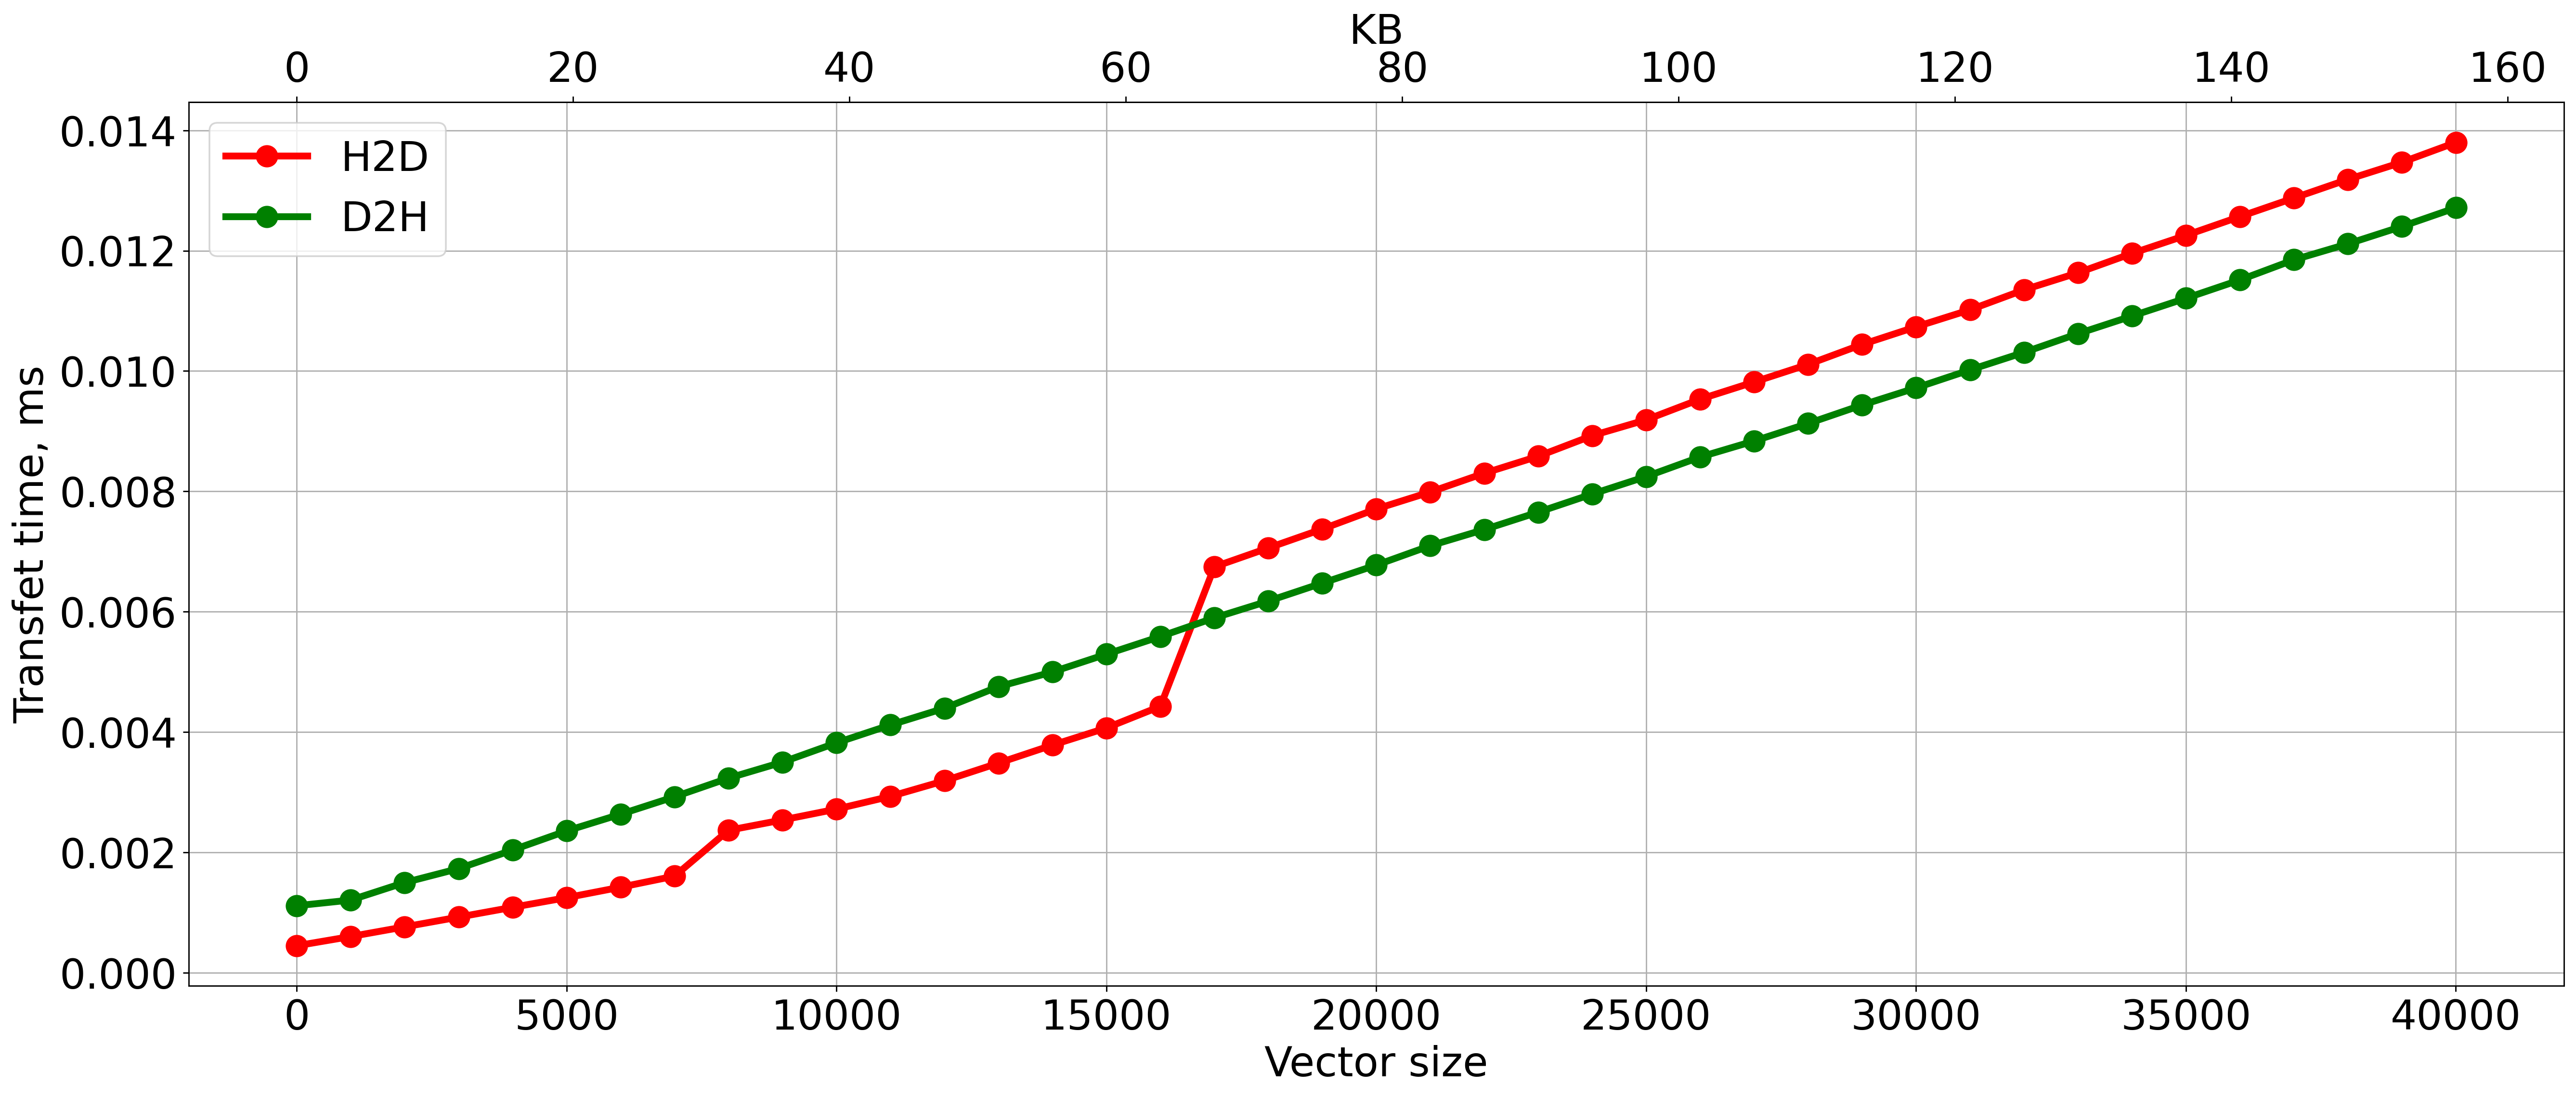

In [41]:
fig = plt.figure(figsize=[21, 9], dpi=256)
ax = fig.gca()

inverse = lambda x : x * 4 / (1024)
ax.plot(ns , times_trans_h2d, marker='o', linewidth=4, markersize=12, label=f'H2D', color='r')
ax.plot(ns , times_trans_d2h, marker='o', linewidth=4, markersize=12, label=f'D2H', color='g')

ax_2 = ax.secondary_xaxis('top', functions=(inverse, inverse))
ax_2.set_xlabel('KB', fontsize=24)
ax_2.tick_params(labelsize=24)

ax.legend(fontsize=24)
ax.set_xlabel('Vector size', fontsize=24)
ax.set_ylabel('Transfet time, ms', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.grid()
fig.tight_layout()

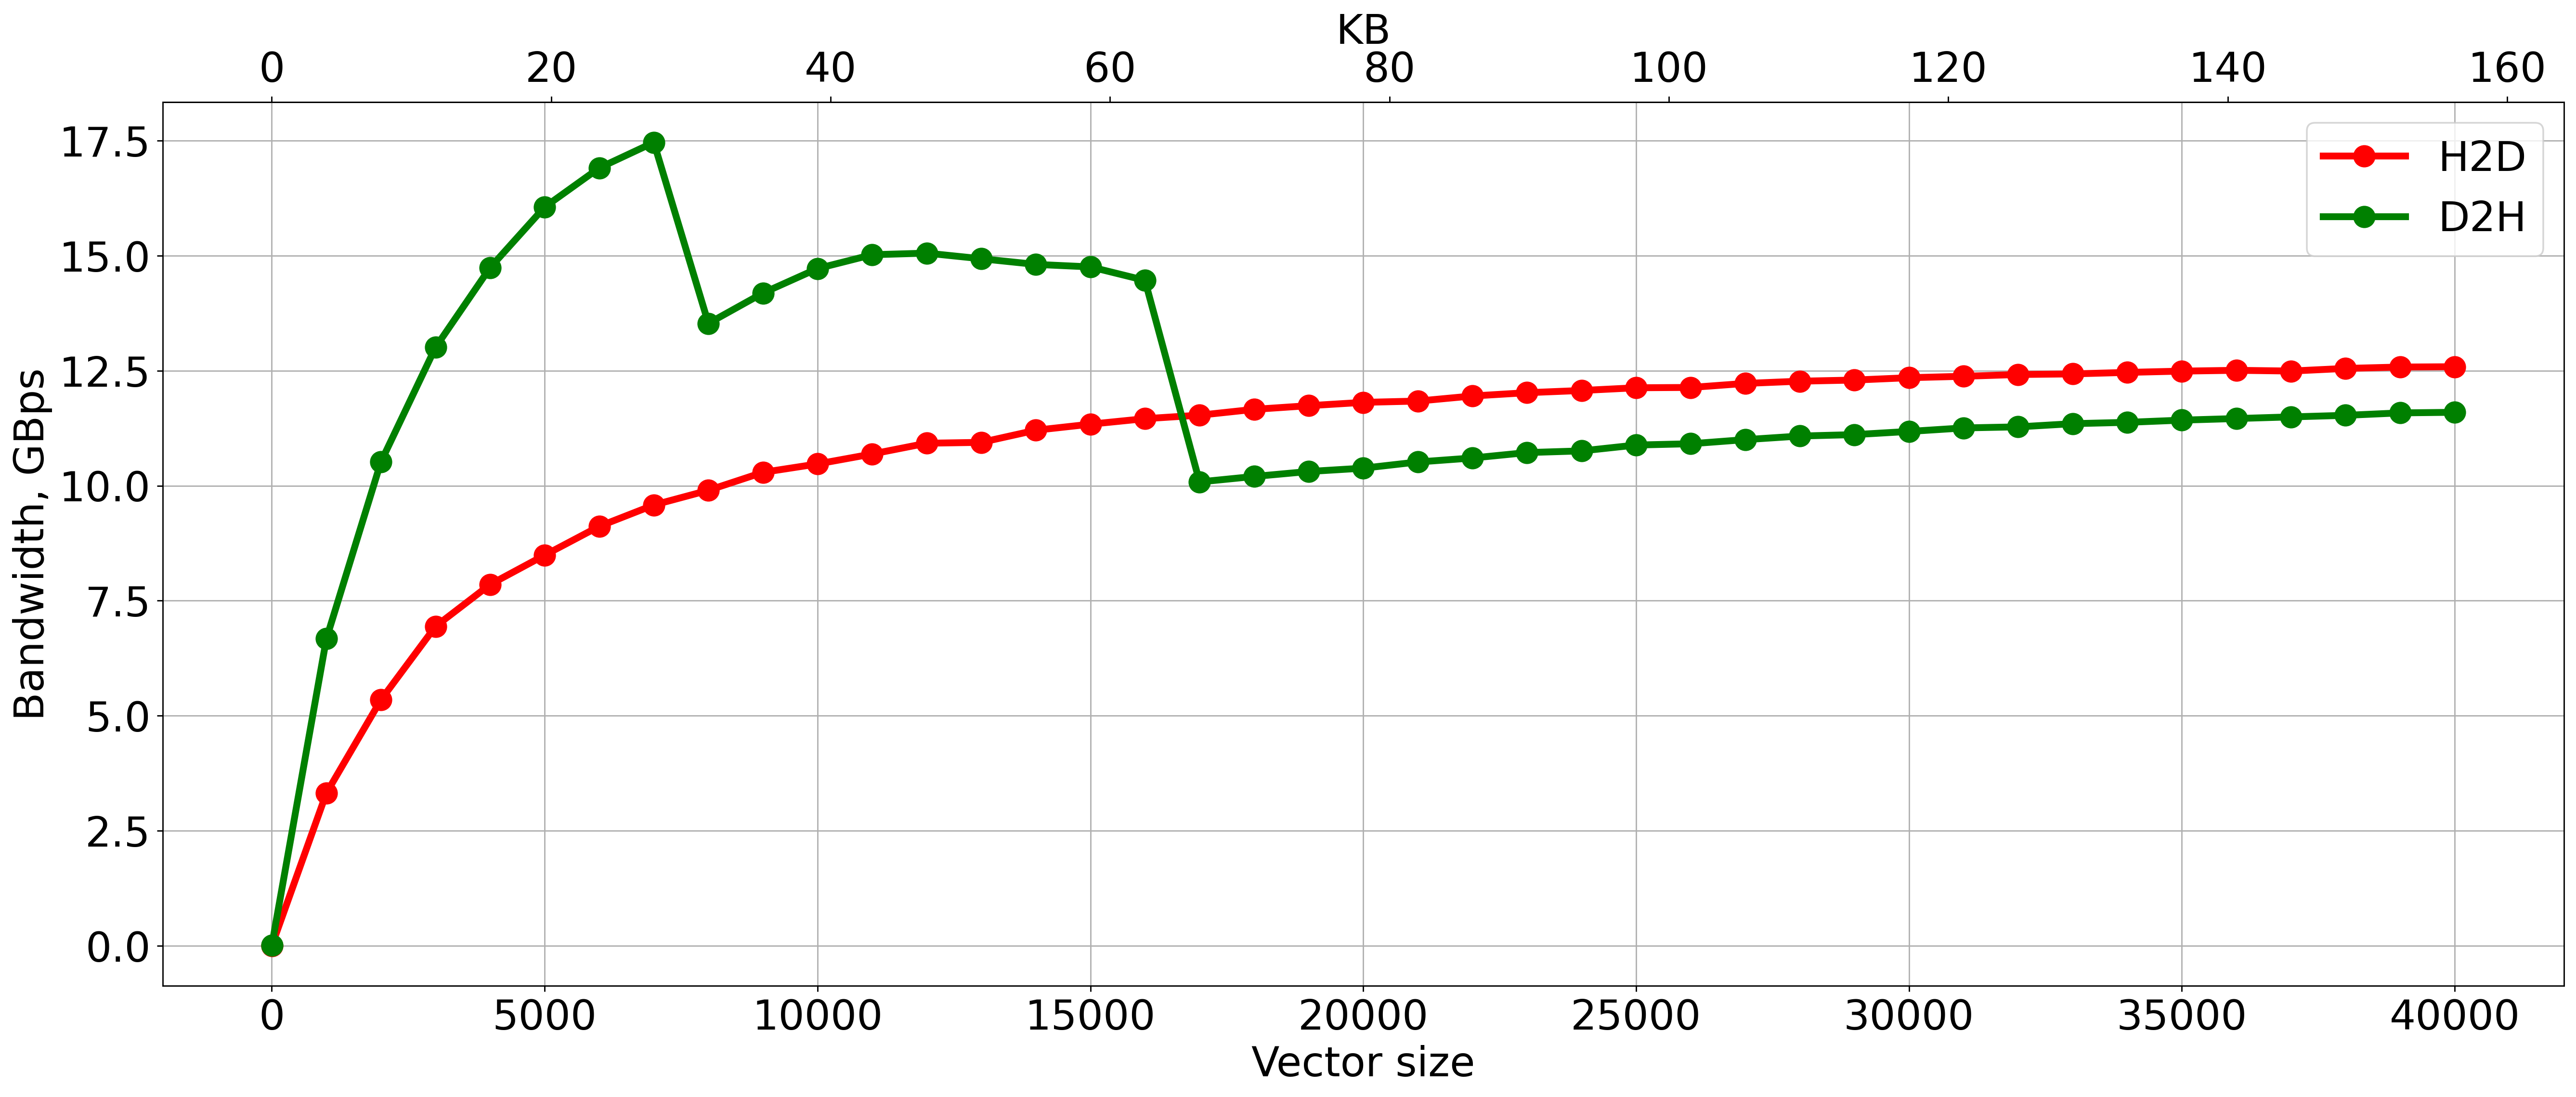

In [42]:
fig = plt.figure(figsize=[21, 9], dpi=256)
ax = fig.gca()

inverse = lambda x : x * 4 / (1024)
ax.plot(ns , (ns * 4 / (times_trans_d2h * 1e-3)) / 1e9, marker='o', linewidth=4, markersize=12, label=f'H2D', color='r')
ax.plot(ns , (ns * 4 / (times_trans_h2d * 1e-3)) / 1e9, marker='o', linewidth=4, markersize=12, label=f'D2H', color='g')

ax_2 = ax.secondary_xaxis('top', functions=(inverse, inverse))
ax_2.set_xlabel('KB', fontsize=24)
ax_2.tick_params(labelsize=24)

ax.legend(fontsize=24)
ax.set_xlabel('Vector size', fontsize=24)
ax.set_ylabel('Bandwidth, GBps', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.grid()
fig.tight_layout()